Mojisola Adegbulugbe

Research Question:

What is the correlation between the smoker status of the individual and the amount of the medical charge? Also, how is the correlation between smoker and body mass index further affect the monetary amount of the insurance charge an individual receives. 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
med_data = pd.read_csv("https://gist.githubusercontent.com/meperezcuello/82a9f1c1c473d6585e750ad2e3c05a41/raw/d42d226d0dd64e7f5395a0eec1b9190a10edbc03/Medical_Cost.csv")
med_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Milestone 3

Task 1: EDA
I will begin by looking at the general shape and general trends found within the data set.


In [ ]:
med_data.shape

(1338, 7)

In [ ]:
med_data.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [ ]:
med_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
med_data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [ ]:
med_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<AxesSubplot:xlabel='charges', ylabel='bmi'>

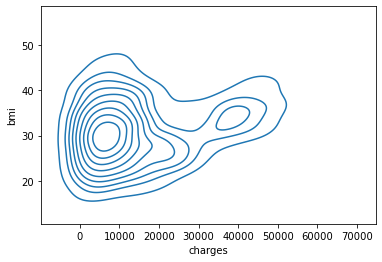

In [ ]:
sns.kdeplot(x=med_data['charges'],y=med_data['bmi'])

<seaborn.axisgrid.FacetGrid>

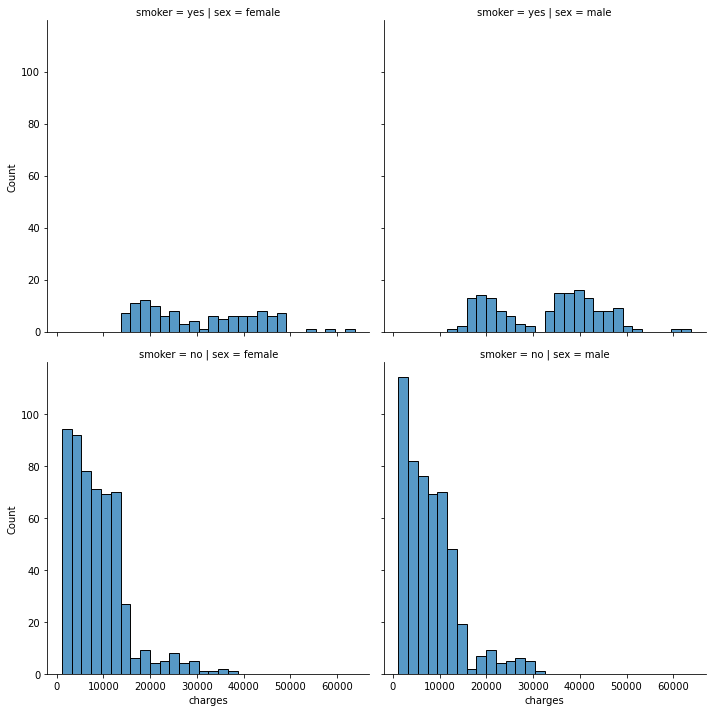

In [ ]:
sns.displot(med_data, x="charges", col="sex", row="smoker")

It looks as if there is a higher amount of lower charges (1000-400000) in the factor of non smokers for both males and females but there is a lesser amount of chrges but higher charge value for male and femal smokers. Also, male smokers have higher charge value and higher amounts of charges than female members.

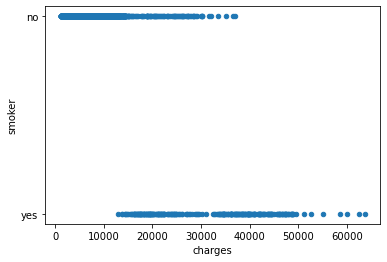

In [ ]:
plot1= med_data.plot(kind= 'scatter', x='charges', y ='smoker')

It is evident that individuals who smoke are one, less likely to have a medical insurance charge and two, if they are presented with a medical insurance charge than the charge will be lower in comparison to an individual who smokes who will be more likely to have a medical charge and more likely to have a medical insurance charge of a higher monetary value.  

Task 2: Data Analysis Pipeline
1.load data
2.clean data

I will be removing the following categories of children/dependant and region as even though they provide valuable information to the rich data set that we have chosen, the information provided is not necessary for my own data analysis pipeline. 


In [ ]:
med_data
data_cleaned = med_data.copy().drop(['children','region', 'age', 'sex'], axis=1)
data_cleaned.head()

,bmi,smoker,charges
0,27.900,yes,16884.92400
1,33.770,no,1725.55230
2,33.000,no,4449.46200
3,22.705,no,21984.47061
4,28.880,no,3866.85520


Task 3: Process Data

I am going to add a column for the individual to see if they have a high body mass index, categorized as being overweight (a BMI greater than 25) as there is an assumable positive correlation between individuals who smoke and individuals who have a higher body mass index. 

In [ ]:
data_cleaned["bmi"]= data_cleaned["bmi"] > 25
data_cleaned

,bmi,smoker,charges
0,True,yes,16884.92400
1,True,no,1725.55230
2,True,no,4449.46200
3,False,no,21984.47061
4,True,no,3866.85520
...,...,...,...
1333,True,no,10600.54830
1334,True,no,2205.98080
1335,True,no,1629.83350
1336,True,no,2007.94500


Task 4: Analysis to Help Answer the Research Question

table 1 and 2 and create two plots, 1 based on whether they are a smoker and the other based on whether they are not a smoker (yes or no ranking) : rank medical charges based on smoker status, if they are a smoker does it increase and if they are not a smoker will they have a lower medical charge

table 3 and create 1 plot: when looking at individuals who are yes in the smoker status column add a column that ranks bmi and see if individuals with a high bmi and who are also positive for smoking have higher medical charges






In [ ]:
#table 1: smoker status= no and rank in descending order their medical charges and drop the bmi category for now
data_cleaned2 = data_cleaned.drop(['bmi'], axis=1)
data_cleaned2 = data_cleaned2.sort_values( 'charges', ascending = False)
(data_cleaned2[data_cleaned2.smoker != 'yes'])



,smoker,charges
1206,no,36910.60803
1012,no,36580.28216
242,no,35160.13457
599,no,33471.97189
936,no,32108.66282
...,...,...
22,no,1137.01100
663,no,1136.39940
1244,no,1135.94070
808,no,1131.50660


In [ ]:
#table 2: smoker status = yes rank in descending order their medical charges and drop the bmi category for now
data_cleaned2 = data_cleaned.drop(['bmi'], axis=1)
data_cleaned2 = data_cleaned2.sort_values( 'charges', ascending = False)
(data_cleaned2[data_cleaned2.smoker != 'no'])



,smoker,charges
543,yes,63770.42801
1300,yes,62592.87309
1230,yes,60021.39897
577,yes,58571.07448
819,yes,55135.40209
...,...,...
412,yes,14455.64405
1282,yes,14283.45940
362,yes,13844.50600
1033,yes,13747.87235


<AxesSubplot:title={'center':'charges'}, xlabel='smoker'>

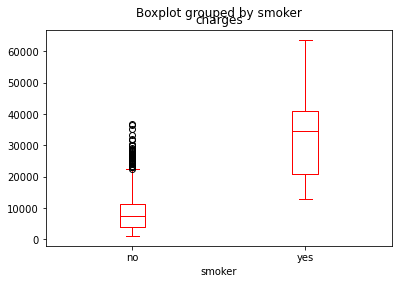

In [ ]:
data_cleaned2 = data_cleaned2.sort_values( 'charges', ascending = False)
#(data_cleaned2[data_cleaned2.smoker != 'no'])
data_cleaned2.boxplot(column=['charges'],by='smoker', grid=False, color='red')

I chose to utilize a Boxplot to display the correlation between the smoker status (in this specific graph comparing yes and no status) and the monetary value of the medical insurance charge.

In [ ]:
#table 3: smoker status= yes and add a column looking at individuals with bmi > 25 and then rank the medical charges in descending order
data_cleaned["bmi"]= data_cleaned["bmi"] > 25
data_cleaned= data_cleaned.sort_values( 'charges', ascending = False)
(data_cleaned[data_cleaned.smoker != 'no'])





,bmi,smoker,charges
543,False,yes,63770.42801
1300,False,yes,62592.87309
1230,False,yes,60021.39897
577,False,yes,58571.07448
819,False,yes,55135.40209
...,...,...,...
412,False,yes,14455.64405
1282,False,yes,14283.45940
362,False,yes,13844.50600
1033,False,yes,13747.87235


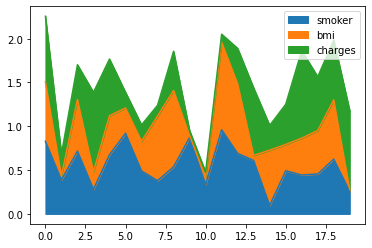

In [ ]:
data_cleaned = pd.DataFrame(np.random.rand(20,3),
                               columns=['smoker','bmi','charges']
                           )
data_cleaned.plot.area()
title='Comparing Medical insurance charge against positive smoker status and BMI variance'

In [ ]:
data_cleaned.to_csv('moji_cleaned_data', index=False)

In [ ]:
data_cleaned.plot(kind='hist', subplots=True, title=['bmi','smoker', 'charges'])
data_cleaned.set(xticklabels=[])




[[Text(0, 0, ''),
  Text(1, 0, ''),
  Text(2, 0, ''),
  Text(3, 0, ''),
  Text(4, 0, ''),
  Text(5, 0, ''),
  Text(6, 0, ''),
  Text(7, 0, ''),
  Text(8, 0, ''),
  Text(9, 0, ''),
  Text(10, 0, ''),
  Text(11, 0, ''),
  Text(12, 0, ''),
  Text(13, 0, ''),
  Text(14, 0, ''),
  Text(15, 0, ''),
  Text(16, 0, ''),
  Text(17, 0, ''),
  Text(18, 0, ''),
  Text(19, 0, '')]]